## General Regression Analytics

This Notebook shows the correlation matrix and the use of the coefficient of determination ($  R^2   $).

## Coefficient of determination ($ R^2 $)

The closer $ R^2  $ is to 1, the better. 

In [1]:
################################################
##
## regression with DL for system control
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score


#######################################################

N_EPOCHS = 10000
batch_size = 5
learning_rate = 0.001 ## 1e-5 

#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

#######################################################

In [2]:
CFD_raw_data = pd.read_csv('CFD.6.2022.csv') 

/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


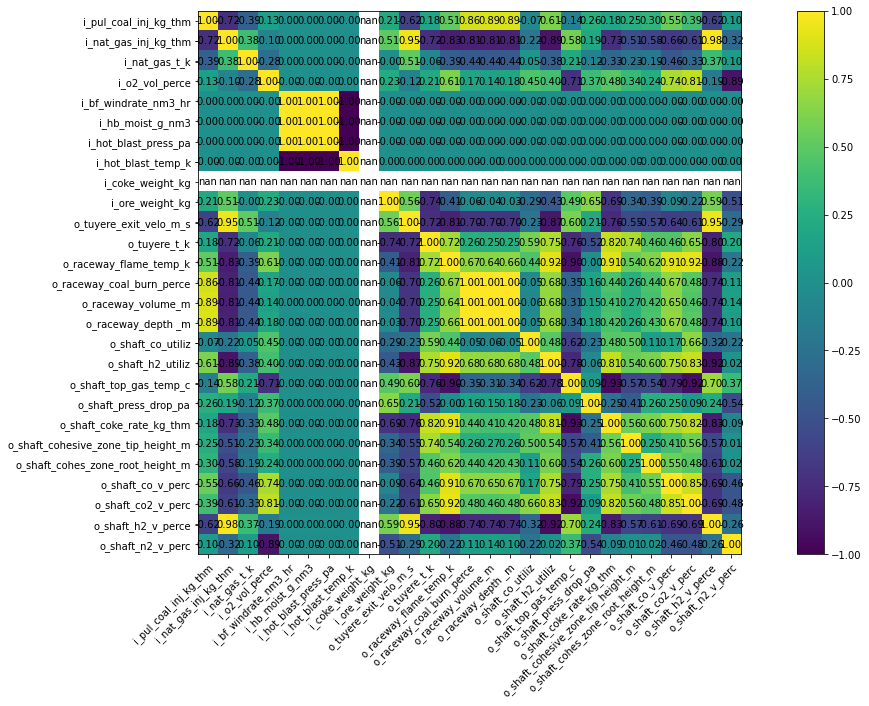

In [3]:


my_all_28_names = ['i_pul_coal_inj_kg_thm','i_nat_gas_inj_kg_thm','i_nat_gas_t_k','i_o2_vol_perce',
             'i_bf_windrate_nm3_hr','i_hb_moist_g_nm3','i_hot_blast_press_pa','i_hot_blast_temp_k',
             'i_coke_weight_kg','i_ore_weight_kg','o_tuyere_exit_velo_m_s','o_tuyere_t_k','o_raceway_flame_temp_k','o_raceway_coal_burn_perce',
             'o_raceway_volume_m','o_raceway_depth _m','o_shaft_co_utiliz','o_shaft_h2_utiliz',
             'o_shaft_top_gas_temp_c','o_shaft_press_drop_pa','o_shaft_coke_rate_kg_thm',
             'o_shaft_cohesive_zone_tip_height_m','o_shaft_cohes_zone_root_height_m','o_shaft_co_v_perc',
             'o_shaft_co2_v_perc','o_shaft_h2_v_perce','o_shaft_n2_v_perc']


## cm = np.corrcoef(CFD_raw_data.values.T)
## hm = heatmap(cm, row_names=CFD_raw_data.columns, column_names=CFD_raw_data.columns, figsize=(20, 10))

cm = np.corrcoef(CFD_raw_data[my_all_28_names].values.T)
hm = heatmap(cm, row_names=my_all_28_names, column_names=my_all_28_names, figsize=(20, 10))
## plt.tight_layout()
plt.show()

In [4]:
headers_list = CFD_raw_data.columns.values.tolist()
print(headers_list)
print(len(headers_list))
print(headers_list[27])

for i, name in enumerate(headers_list):
    print((i, name))

['index', 'i_pul_coal_inj_kg_thm', 'i_nat_gas_inj_kg_thm', 'i_nat_gas_t_k', 'i_o2_vol_perce', 'i_bf_windrate_nm3_hr', 'i_hb_moist_g_nm3', 'i_hot_blast_press_pa', 'i_hot_blast_temp_k', 'i_coke_weight_kg', 'i_ore_weight_kg', 'o_tuyere_exit_velo_m_s', 'o_tuyere_t_k', 'o_raceway_flame_temp_k', 'o_raceway_coal_burn_perce', 'o_raceway_volume_m', 'o_raceway_depth _m', 'o_shaft_co_utiliz', 'o_shaft_h2_utiliz', 'o_shaft_top_gas_temp_c', 'o_shaft_press_drop_pa', 'o_shaft_coke_rate_kg_thm', 'o_shaft_cohesive_zone_tip_height_m', 'o_shaft_cohes_zone_root_height_m', 'o_shaft_co_v_perc', 'o_shaft_co2_v_perc', 'o_shaft_h2_v_perce', 'o_shaft_n2_v_perc']
28
o_shaft_n2_v_perc
(0, 'index')
(1, 'i_pul_coal_inj_kg_thm')
(2, 'i_nat_gas_inj_kg_thm')
(3, 'i_nat_gas_t_k')
(4, 'i_o2_vol_perce')
(5, 'i_bf_windrate_nm3_hr')
(6, 'i_hb_moist_g_nm3')
(7, 'i_hot_blast_press_pa')
(8, 'i_hot_blast_temp_k')
(9, 'i_coke_weight_kg')
(10, 'i_ore_weight_kg')
(11, 'o_tuyere_exit_velo_m_s')
(12, 'o_tuyere_t_k')
(13, 'o_raceway

In [5]:
CFDdata_np = CFD_raw_data.to_numpy()
print(CFDdata_np)
print(CFDdata_np.shape)

[[ 1.          0.         37.9        ...  0.1941631   0.0438327
   0.5448123 ]
 [ 2.          0.         37.9        ...  0.2186134   0.04034286
   0.5149459 ]
 [ 3.          0.         37.9        ...  0.2353341   0.03772617
   0.4849808 ]
 ...
 [54.         70.          0.         ...  0.2279862   0.02182447
   0.5193577 ]
 [55.         70.          0.         ...  0.2387356   0.02094042
   0.4884186 ]
 [56.         70.          0.         ...  0.2464429   0.01986916
   0.4608655 ]]
(56, 28)


/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/user/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


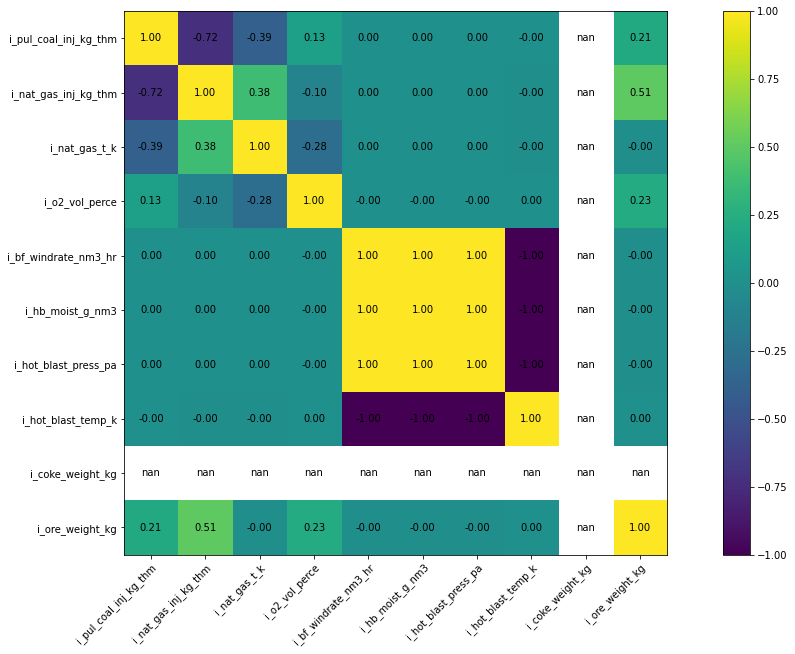

In [6]:

my_row_names = ['i_pul_coal_inj_kg_thm','i_nat_gas_inj_kg_thm','i_nat_gas_t_k','i_o2_vol_perce',
             'i_bf_windrate_nm3_hr','i_hb_moist_g_nm3','i_hot_blast_press_pa','i_hot_blast_temp_k',
             'i_coke_weight_kg','i_ore_weight_kg']



cm = np.corrcoef(CFD_raw_data[my_row_names].values.T)
hm = heatmap(cm, row_names=my_row_names, column_names=my_row_names, figsize=(20, 10))
## plt.tight_layout()
plt.show()

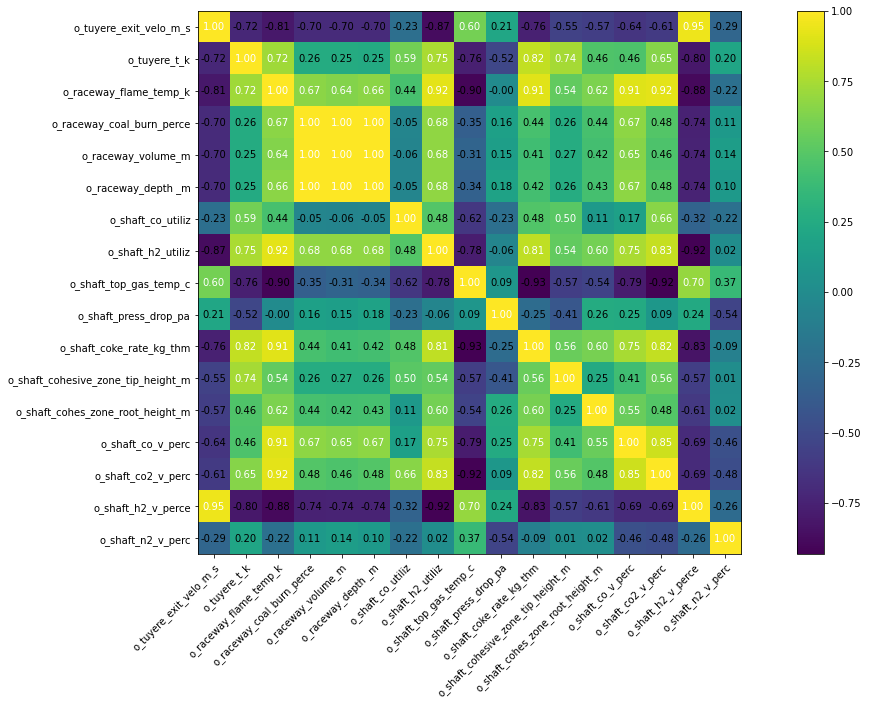

In [7]:
my_col_names = ['o_tuyere_exit_velo_m_s','o_tuyere_t_k','o_raceway_flame_temp_k','o_raceway_coal_burn_perce',
             'o_raceway_volume_m','o_raceway_depth _m','o_shaft_co_utiliz','o_shaft_h2_utiliz',
             'o_shaft_top_gas_temp_c','o_shaft_press_drop_pa','o_shaft_coke_rate_kg_thm',
             'o_shaft_cohesive_zone_tip_height_m','o_shaft_cohes_zone_root_height_m','o_shaft_co_v_perc',
             'o_shaft_co2_v_perc','o_shaft_h2_v_perce','o_shaft_n2_v_perc']

cm = np.corrcoef(CFD_raw_data[my_col_names].values.T)
hm = heatmap(cm, row_names=my_col_names, column_names=my_col_names, figsize=(20, 10))
## plt.tight_layout()
plt.show()

## Experiment description

This run is done using CFD. Used an 80% train test split. The CFD data has 56 samples where each sample has 27 features. There are 10 inputs and 17 outputs. All inputs and outputs were used. Tested an MLP and a 2 layer DL architecture.

Train_X.........(44, 10)

Train_y.........(44, 17)

Test_X.........(12, 10)

Test_y.........(12, 17)

Results are at the bottom.

In [8]:
#######################################################


def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss:', loss_fn(model(X_train_tr), y_train_tr))
    print('Training R**2:', r2_score(y_train_tr.numpy(), model(X_train_tr).detach().numpy()))
    
#######################################################

In [9]:
#######################################################

input_indeces  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_indeces = [11, 12 ,13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

#######################################################

X = CFDdata_np[:, input_indeces]

y = CFDdata_np[:, output_indeces]

print(X.shape)
print(y.shape)

#######################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56, 10)
(56, 17)
(44, 10)
(12, 10)
(44, 17)
(12, 17)


In [10]:
## fix data type
X_train  = X_train.astype(np.float32)
X_test   = X_test.astype(np.float32)
y_train  = y_train.astype(np.float32)
y_test   = y_test.astype(np.float32)

X_train_tr  = torch.from_numpy(X_train)
X_test_tr   = torch.from_numpy(X_test)
y_train_tr  = torch.from_numpy(y_train)
y_test_tr   = torch.from_numpy(y_test)

In [11]:
#######################################################
## define dataset

train_ds = TensorDataset(X_train_tr, y_train_tr)

#######################################################
## define dataloader

train_dl = DataLoader(train_ds, batch_size, shuffle=True)


#######################################################

In [12]:

#######################################################
## Linear Regression

class LinRegNet(nn.Module):
    ## initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 17) 

    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        return x


#######################################################
## MLP

class SimpleNet(nn.Module):
    ## initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 32)
        self.act1    = nn.Tanh() 
        self.linear2 = nn.Linear(32, 17)
    
    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        return x
    
#############################################################
## DL


class DL_Net(nn.Module):
    ## initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 32)
        self.act1    = nn.Tanh() 
        self.linear2 = nn.Linear(32, 24)
        self.act2    = nn.Tanh() 
        self.linear3 = nn.Linear(24, 17)
    
    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.linear3(x)
        return x
    
#############################################################


class SimpleNet_Dropout(nn.Module):
    ## initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 32)
        self.act1    = nn.Tanh() 
        self.linear2 = nn.Linear(32, 17)
        self.dropout = nn.Dropout(0.25)
    
    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x
    
#############################################################

class DL_Net_Dropout(nn.Module):
    ## initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 32)
        self.act1    = nn.Tanh() 
        self.linear2 = nn.Linear(32, 24)
        self.act2    = nn.Tanh() 
        self.linear3 = nn.Linear(24, 17)
        self.dropout = nn.Dropout(0.25)
    
    ## perform inference
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.act2(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x
    
#############################################################

In [13]:
#############################################################
## model = LinRegNet()
## model = SimpleNet()
model = DL_Net()

## model = SimpleNet_Dropout()
## model = DL_Net_Dropout()

## opt = torch.optim.SGD(   model.parameters(), lr=learning_rate  )
opt = torch.optim.Adam(   model.parameters(), lr=learning_rate   )
loss_fn = F.mse_loss

#############################################################

In [14]:
fit(N_EPOCHS, model, loss_fn, opt)

Training loss: tensor(848381312., grad_fn=<MseLossBackward0>)
Training R**2: -6.563158609974839


In [15]:
for i in range(len(X_test_tr)):
    print("**************************************************")
    print("preds, real")
    preds = model(X_test_tr[i])
    np_pred = preds.detach().numpy()
    np_real = y_test_tr[i].detach().numpy()
    for j in range(len(np_pred)):
        print((np_pred[j], np_real[j]))

**************************************************
preds, real
(136.79324, 133.4865)
(1413.6409, 1440.96)
(2131.3281, 2202.8)
(33.14149, 0.0)
(0.20758186, 0.1965359)
(0.8237315, 0.8111)
(47.175365, 47.20085)
(42.93759, 42.99392)
(114.25026, 118.8785)
(2251.2244, 108434.33)
(433.78098, 462.73654)
(31.18282, 31.83963)
(9.902957, 10.649022)
(0.24009751, 0.2171919)
(0.21090946, 0.1941631)
(0.06425669, 0.043832704)
(0.48060757, 0.5448123)
**************************************************
preds, real
(136.79324, 133.9054)
(1413.6409, 1444.46)
(2131.3281, 2214.316)
(33.14149, 0.0)
(0.20758186, 0.1965359)
(0.8237315, 0.8111)
(47.175365, 48.77197)
(42.93759, 43.93872)
(114.25026, 104.5031)
(2251.2244, 101647.98)
(433.78098, 454.2938)
(31.18282, 31.75963)
(9.902957, 9.713824)
(0.24009751, 0.2119294)
(0.21090946, 0.2017688)
(0.06425669, 0.043137867)
(0.48060757, 0.543164)
**************************************************
preds, real
(136.79324, 157.34734)
(1413.6409, 1367.4567)
(2131.3281, 1805

In [16]:
print('Test loss:', loss_fn(model(X_test_tr), y_test_tr))
print('Testing R**2:', r2_score(y_test_tr.numpy(), model(X_test_tr).detach().numpy()))

Test loss: tensor(769856064., grad_fn=<MseLossBackward0>)
Testing R**2: -6.112900274512412


In [17]:
'''

model.eval()

dummy_input = torch.randn(1, 10)


input_names = ["input1"]
output_names = ["output1"]

torch.onnx.export(
  model, 
  dummy_input, 
  "ONNXmodels/CFDall.onnx", 
  verbose=False, 
  input_names=input_names,
  output_names=output_names
)

'''

'\n\nmodel.eval()\n\ndummy_input = torch.randn(1, 10)\n\n\ninput_names = ["input1"]\noutput_names = ["output1"]\n\ntorch.onnx.export(\n  model, \n  dummy_input, \n  "ONNXmodels/CFDall.onnx", \n  verbose=False, \n  input_names=input_names,\n  output_names=output_names\n)\n\n'

In [18]:
print(X_test_tr[5] )
preds = model(    X_test_tr[5]     )
print(    preds)
print(    y_test_tr[5]             )

tensor([   38.0000,     0.0000,   300.0000,    27.0000, 308750.3750,    12.1540,
        359906.3125,  1459.8170, 24494.0000, 87618.0156])
tensor([  136.7932,  1413.6409,  2131.3281,    33.1415,     0.2076,     0.8237,
           47.1754,    42.9376,   114.2503,  2251.2244,   433.7810,    31.1828,
            9.9030,     0.2401,     0.2109,     0.0643,     0.4806],
       grad_fn=<AddBackward0>)
tensor([  128.5721,  1429.0322,  2617.3091,    98.5278,     0.2167,     0.8389,
           46.6556,    43.1349,    77.2359, 119367.6016,   520.1385,    31.7596,
           10.4790,     0.2648,     0.2316,     0.0165,     0.4870])
